In [174]:
# !pip install pandas_datareader

In [175]:
# Stock prediction using LSTM, using the 60 days stock price

import yfinance as yf
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt





In [176]:
plt.style.use('fivethirtyeight')


In [177]:
df = yf.download('AAPL', start='2012-01-01', end='2024-04-01')
df.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-22,171.759995,173.050003,170.059998,172.279999,172.279999,71106600
2024-03-25,170.570007,171.940002,169.449997,170.850006,170.850006,54288300
2024-03-26,170.000000,171.419998,169.580002,169.710007,169.710007,57388400
2024-03-27,170.410004,173.600006,170.110001,173.309998,173.309998,60273300
2024-03-28,171.750000,172.229996,170.509995,171.479996,171.479996,65672700


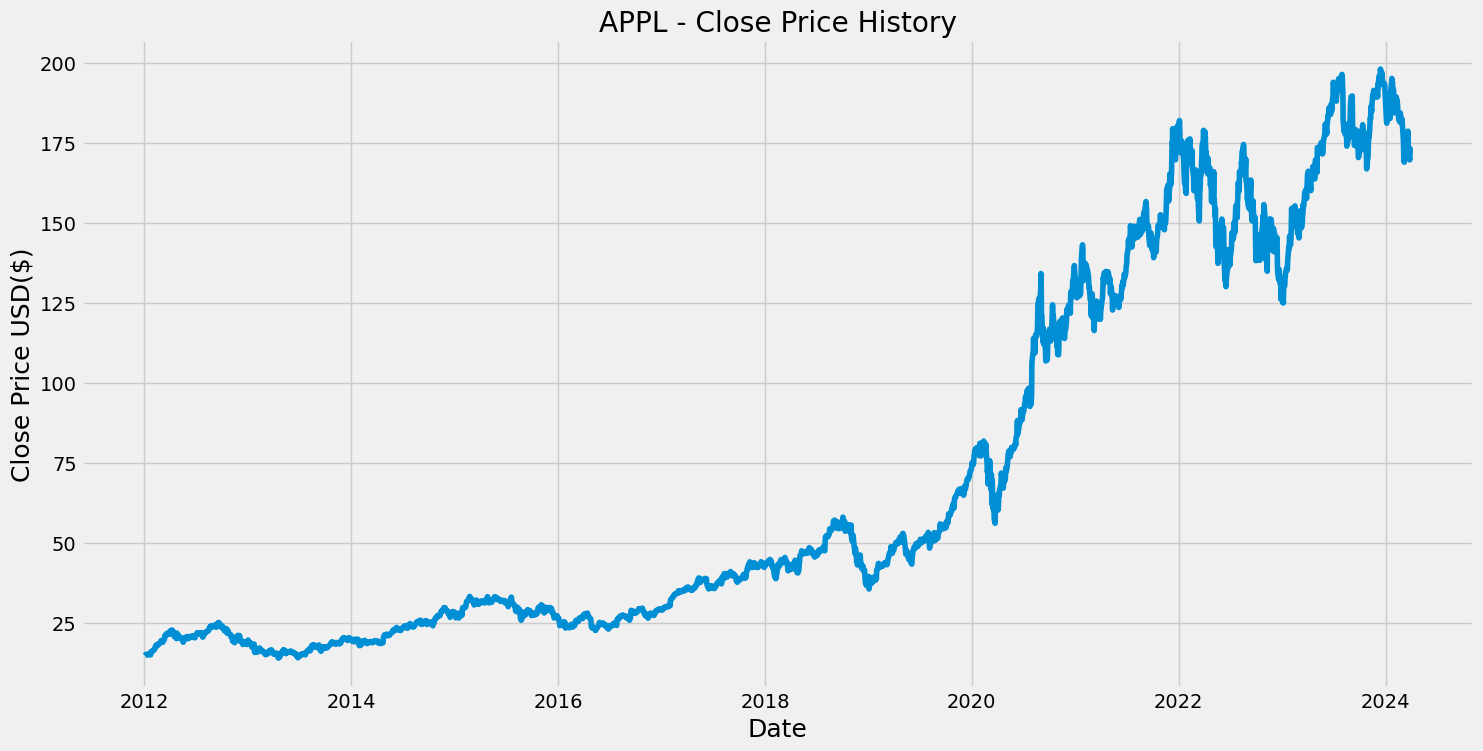

In [204]:
# df.shape
plt.figure(figsize = (16,8))
plt.title('APPL - Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()


In [179]:
data= df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

2464

In [180]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.8457884 ],
       [0.8653363 ],
       [0.85539942]])

In [181]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
range_lookup = 60
for i in range(range_lookup, len(train_data)):
    x_train.append(train_data[i-range_lookup:i,0])
    y_train.append(train_data[i,0])

    if i <= range_lookup:
        print(x_train)
        print(y_train)
        print()
    


[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]



In [182]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2404, 60, 1)

In [183]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [184]:
model.compile(optimizer='adam', loss ='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)


2404/2404 [==============================] - 27s 10ms/step - loss: 0.0012


In [185]:
test_data = scaled_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(range_lookup, len(test_data)):
    x_test.append(test_data[i-60:i,0])



In [186]:
# 36min here
x_test = np.array(x_test)

x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [187]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


20/20 [==============================] - 1s 7ms/step


In [188]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse


9.376970378916917

C:\Users\onayr\AppData\Local\Temp\ipykernel_66984\1876192003.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


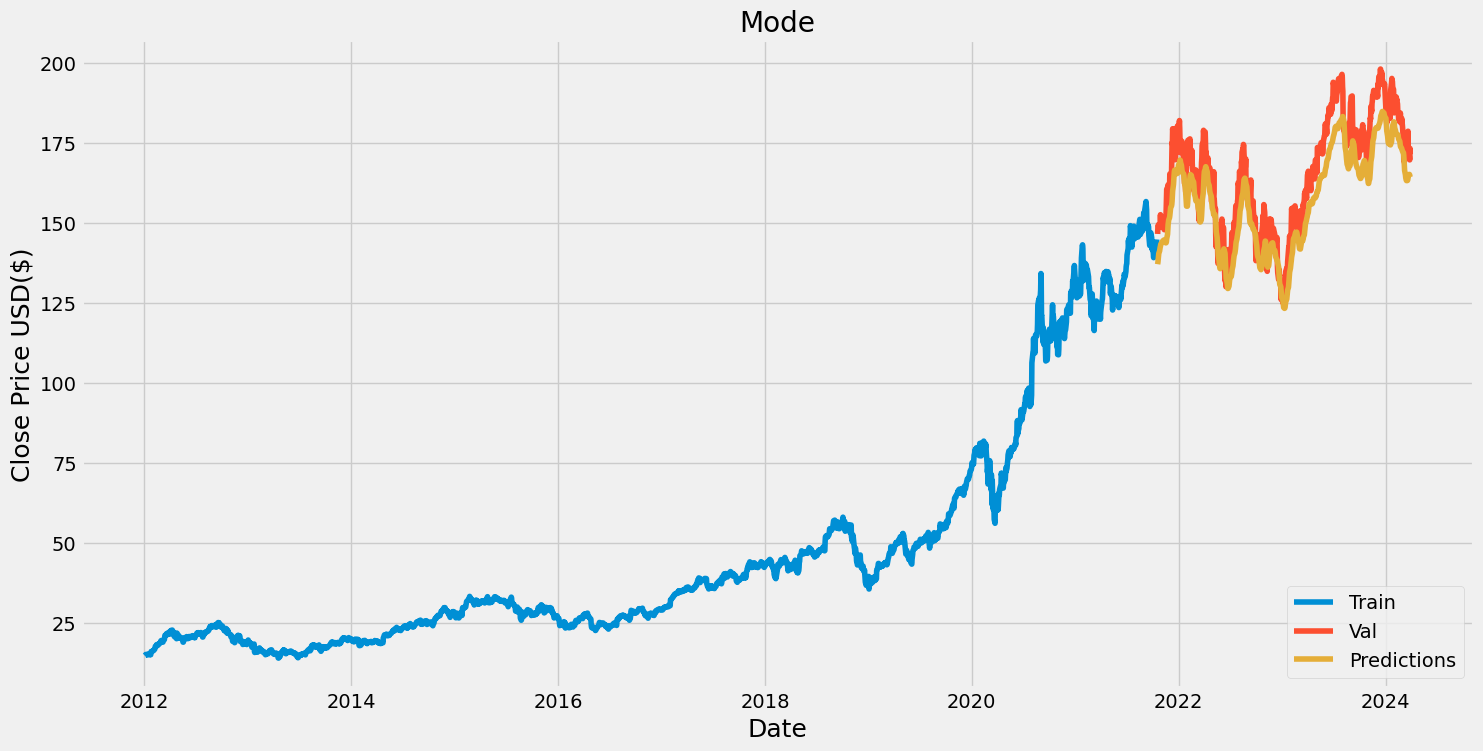

In [189]:
# Plot
train = data[:training_data_len]
valid = data [training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Mode')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()





In [190]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-10-18,146.550003,137.090179
2021-10-19,148.759995,137.652451
2021-10-20,149.259995,138.498795
2021-10-21,149.479996,139.469070
2021-10-22,148.690002,140.439835
...,...,...
2024-03-22,172.279999,165.106262
2024-03-25,170.850006,165.167892
2024-03-26,169.710007,164.946381


In [191]:
new_df = yf.download('AAPL', start='2012-01-01', end='2024-04-03')
new_df = new_df.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)


# here 47min

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 20ms/step
[[163.14326]]


In [198]:
df_apple_quote = yf.download('AAPL', start='2024-04-03', end='2024-04-04')
print("Predicted price: ", pred_price)
actual_price = df_apple_quote['Close']
print("Actual price: ", actual_price)

[*********************100%%**********************]  1 of 1 completed

Predicted price:  [[163.14326]]
Actual price:  Date
2024-04-03    169.649994
Name: Close, dtype: float64


In [200]:
type(actual_price)

pandas.core.series.Series